In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file I/O
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#input data files are available in the read-only 
import os
for dir_name,_, filenames in os.walk('c:/Users/JAHNAVI/Downloads'):
    for filename in filenames:
        print(os.path.join(dir_name,filename))

c:/Users/JAHNAVI/Downloads\1_Assignment1_14-12-2021_DFA.pdf
c:/Users/JAHNAVI/Downloads\1_Class Note-20211218T041644Z-001.zip
c:/Users/JAHNAVI/Downloads\1_lXojpmw9SNwH-XN-RMOioA.jpeg
c:/Users/JAHNAVI/Downloads\20CS2101_Design & Analysis of Algorithm_MID-1.docx
c:/Users/JAHNAVI/Downloads\2_Video Recordings-20211218T041447Z-001.zip
c:/Users/JAHNAVI/Downloads\3_Assignments-20211218T041424Z-001.zip
c:/Users/JAHNAVI/Downloads\4.Regular Grammar.pdf
c:/Users/JAHNAVI/Downloads\491607_1_En_9_Fig1_HTML.png
c:/Users/JAHNAVI/Downloads\5.Push Down Automata.pdf
c:/Users/JAHNAVI/Downloads\6.Turing machine & computability theory.pdf
c:/Users/JAHNAVI/Downloads\a3dadd82-63cb-4adf-9dfe-b6dc62364c50.pdf
c:/Users/JAHNAVI/Downloads\Academic calendar 2017-2019 batch_26-10-21(1).pdf
c:/Users/JAHNAVI/Downloads\arr-1.pdf
c:/Users/JAHNAVI/Downloads\assignment 4 numphy.docx
c:/Users/JAHNAVI/Downloads\assignment numpy.pdf
c:/Users/JAHNAVI/Downloads\Assignment-1 FLAT.pdf
c:/Users/JAHNAVI/Downloads\bootstrap-4.0.0-di

In [3]:
df=pd.read_csv("C:/Users/JAHNAVI/Downloads/fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [7]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [8]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(17880, 18)

In [11]:
df.fillna(' ',inplace=True)

In [12]:
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [13]:
df['function'].value_counts()
stem=['Information Technology','Engineering', 'Data Analyst', 'Science', 'Business Analyst', 'Quality Assurance']
non_stem=['Sales','Customer Service','Marketing','Administrative','Design','Human Resources']
df_stem=df[df['function'].isin(stem)]
df_non_stem=df[df['function'].isin(non_stem)]
print(df_stem.shape)
print(df_non_stem.shape)
df_non_stem['fraudulent'].value_counts()

(3388, 18)
(4702, 18)


0    4453
1     249
Name: fraudulent, dtype: int64

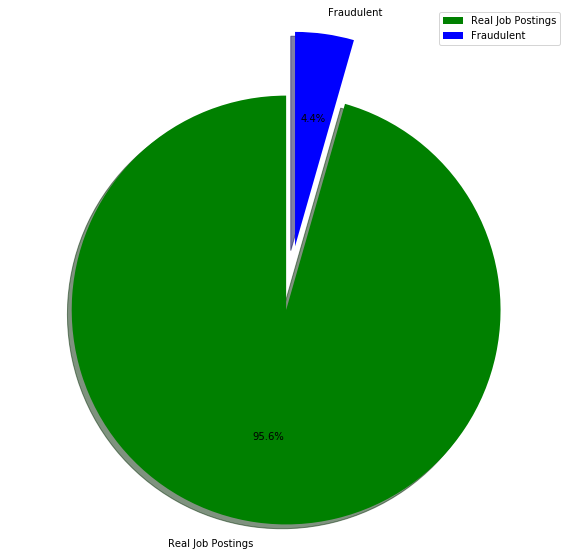

In [14]:
import matplotlib.pyplot as plt

stem_zero=df_stem['fraudulent'].value_counts()[0]
stem_one=df_stem['fraudulent'].value_counts()[1]
non_stem_zero=df_non_stem['fraudulent'].value_counts()[0]
non_stem_one=df_non_stem['fraudulent'].value_counts()[1]

labels='Real Job Postings','Fraudulent'
sizes=[stem_zero,stem_one]
explode=(0,0.3)
colors=['green','blue']

fig1,ax1=plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, colors=colors, labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal') #pie is drawm as a circle
plt.title=('STEM')
plt.legend()
plt.show()

In [15]:
df_num=df[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'salary_range']]
df_cat=df[['title', 'location', 'company_profile', 'requirements', 'employment_type', 'required_experience', 'required_education', 'industry', 'function' ]]

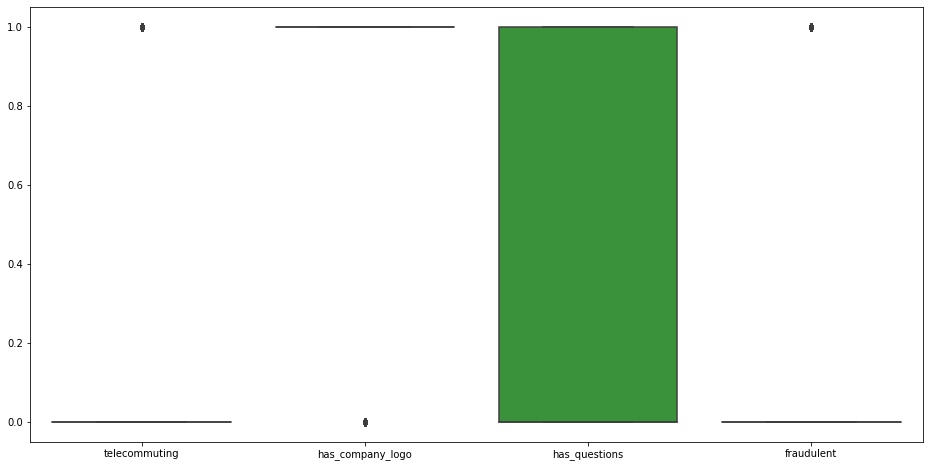

In [16]:
#checking outliers
plt.figure(figsize=[16,8])
sns.boxplot(data=df_num)
plt.show()

In [17]:
#Removing outliers from columns
df_num = df_num[df_num['telecommuting']  < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,
1,0,1,0,0,
2,0,1,0,0,
3,0,1,0,0,
4,0,1,1,0,
...,...,...,...,...,...
17872,0,1,0,0,
17873,0,1,0,0,
17875,0,1,1,0,
17876,0,1,1,0,


In [18]:
df.dropna(axis=0, how='any', inplace=True)

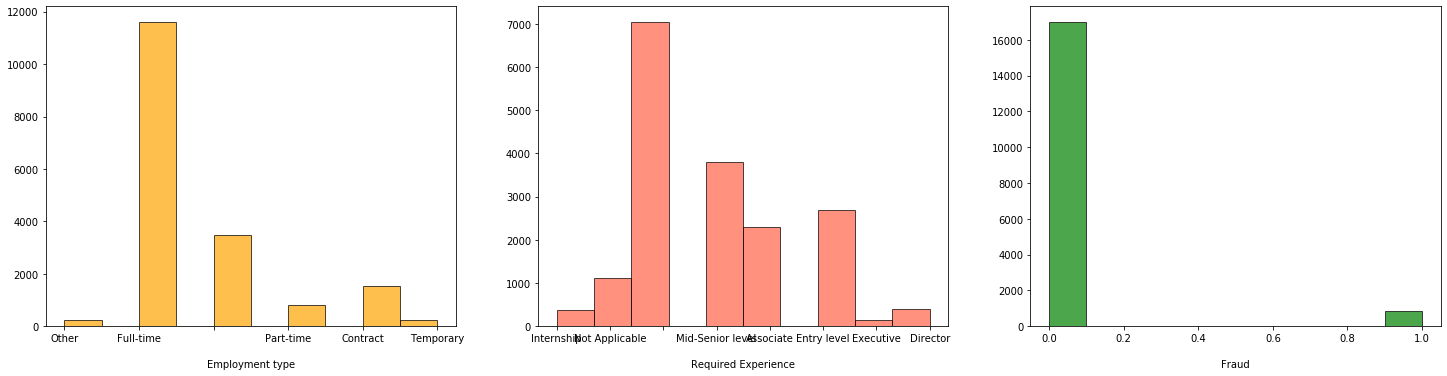

In [19]:
#plots to see the distribution of the continuos features individually

plt.figure(figsize=(25,20))
plt.subplot(3,3,1)
plt.hist(df.employment_type,color='orange',edgecolor='black',alpha=0.7)
plt.xlabel('\nEmployment type')
plt.subplot(3,3,2)
plt.hist(df.required_experience,color='tomato',edgecolor='black',alpha=0.7)
plt.xlabel('\nRequired Experience')
plt.subplot(3,3,3)
plt.hist(df.fraudulent,color='green',edgecolor='black',alpha=0.7)
plt.xlabel('\nFraud')
plt.show()

In [20]:
df.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [21]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [22]:
#visualize Job postings by countries

def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split)

In [23]:
df['country'].nunique()

91

In [24]:
df['country'].value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
HR        1
AL        1
SI        1
SD        1
PE        1
Name: country, Length: 91, dtype: int64

Text(0, 0.5, 'Number of Jobs')

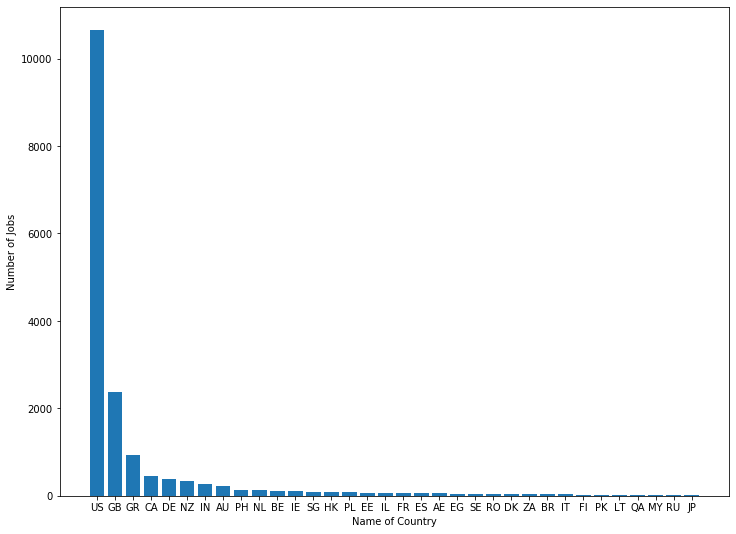

In [25]:
country =dict(df.country.value_counts()[:35])

del country[' ']
plt.figure(figsize=(12,9))

plt.title=('Country-wise Job Posting')
plt.bar(country.keys(),country.values())

plt.xlabel('Name of Country')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of jobs')

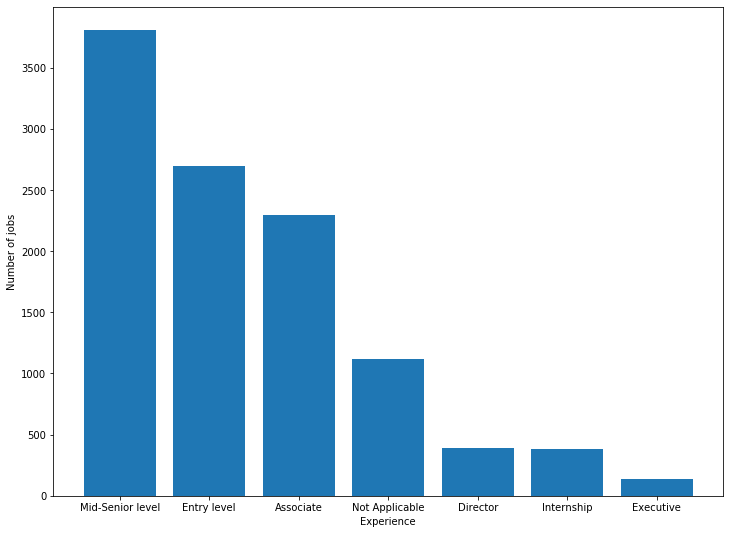

In [26]:
# Visualize Job Posting by Experience
experience=dict(df.required_experience.value_counts()[:45])
del experience[' ']
plt.figure(figsize=(12,9))
plt.title=('Experience-wise job posting')
plt.bar(experience.keys(),experience.values())
plt.xlabel('Experience')
plt.ylabel('Number of jobs')

Text(0, 0.5, 'Number of jobs')

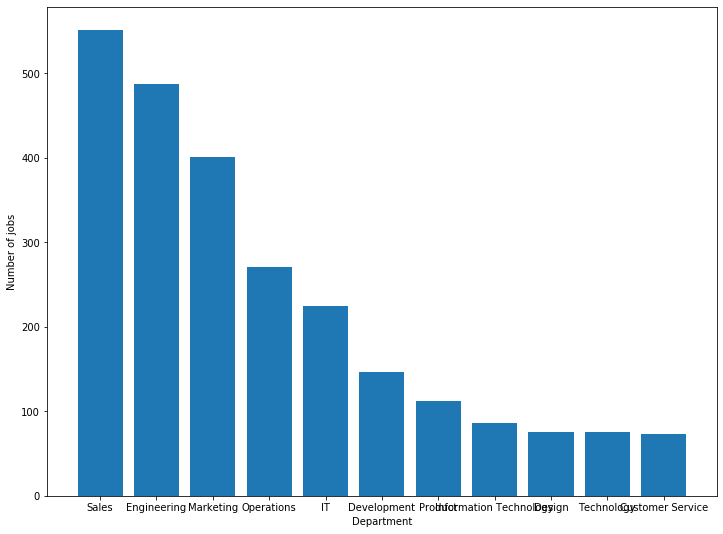

In [27]:
# Visualize Job posting by Department

department=dict(df.department.value_counts()[:12])
del department[' ']
plt.figure(figsize=(12,9))
plt.title=('Department-wise job posting')
plt.bar(department.keys(),department.values())
plt.xlabel('Department')
plt.ylabel('Number of jobs')

In [28]:
# To find the fake Job titles

df.title.value_counts()

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Inside Sales Manager                                    1
English Content Specialist                              1
Mobile Acquisition Manager                              1
Lead Customer Service Associate                         1
Product Marketing Assistant                             1
Name: title, Length: 11231, dtype: int64

In [29]:
df[df.fraudulent == 1].title.value_counts()[:22]

Cruise Staff Wanted *URGENT*                                            21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Payroll Clerk                                                           10
Agency Sales Managers $150-$175,000/yr                                   9
Data Entry                                                               9
Call Center Representative                                               6
Lawn and Maintenance Cont

In [30]:
df[df.fraudulent == 0].title.value_counts()[:22]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Product Manager                                        47
Marketing Manager                                      45
Senior Software Engineer                               44
Customer Service Associate                             44
Web Designer                                           44
iOS Developer 

In [31]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [32]:
df['text']=df['title']+' '+df['location']+' '+df['department']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['employment_type']+' '+df['required_experience']+' '+df['required_education']+' '+df['industry']+' '+df['function']+' '+df['country']
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [33]:
df.head(2000)

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."
...,...,...
1995,1,"Customer service/ Data Entry US, AL, ALEXAND..."
1996,0,"HR Generalist US, TX, Austin Operations We're ..."
1997,0,"Customer Service Associate - Part Time US, CA..."
1998,0,"Project Manager US, TX, Houston Project Manag..."


In [34]:
fraudjobs_text=df[df.fraudulent==1].text
realjobs_text=df[df.fraudulent==0].text

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [36]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
stop_words = set(stopwords.words("english"))

In [38]:
df['text']=df['text'].apply(lambda x:x.lower())

In [39]:
df['text']=df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [40]:
df['text'][0]

"marketing intern us, ny, new york marketing we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging exi

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.text, df.fraudulent, test_size=0.3)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [44]:
# convert the text data into vector format

X_train_dtm = vect.transform(X_train)

In [45]:
X_train_dtm

<12516x86288 sparse matrix of type '<class 'numpy.int64'>'
	with 2363952 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5364x86288 sparse matrix of type '<class 'numpy.int64'>'
	with 983782 stored elements in Compressed Sparse Row format>

In [48]:
# Naive Bayes Classifier

nb = MultinomialNB()
nb.fit(X_train_dtm, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
Y_pred_nb = nb.predict(X_test_dtm)

In [50]:
accuracy_score(Y_test, Y_pred_nb)

0.9737136465324385

In [51]:
# Decision tree classifier

dt=DecisionTreeClassifier()
dt.fit(X_train_dtm, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
Y_pred_dt = dt.predict(X_test_dtm)

In [53]:
accuracy_score(Y_test, Y_pred_dt)

0.9813571961222968

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

In [55]:
# KNeighbors classifier

kn=KNeighborsClassifier()
kn.fit(X_train_dtm, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
Y_pred_kn = kn.predict(X_test_dtm)

In [57]:
accuracy_score(Y_test, Y_pred_kn)

0.9047352721849367

In [58]:
Y = df.fraudulent
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


In [59]:
X=df.drop('fraudulent',1)
print(X.head())

                                                text
0  marketing intern us, ny, new york marketing we...
1  customer service - cloud video production nz, ...
2  commissioning machinery assistant (cma) us, ia...
3  account executive - washington dc us, dc, wash...
4  bill review manager us, fl, fort worth spotsou...


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (14304, 1) (14304,)
Test set: (3576, 1) (3576,)


In [61]:
input_text = ['Home Based Payroll Typist/Data Entry Clerks Positions Available ']

In [62]:
input_data = vect.transform(input_text)
prediction = dt.predict(input_data)

if(prediction[0] == 1):
    print("This Advertisement belonging to fake job post category")
else:
    print("This Advertisement belonging to real job post category")

This Advertisement belonging to fake job post category


In [63]:
input_text = ['Data Entry Admin/Clerical Positions - Work From Home ']

In [64]:
input_data = vect.transform(input_text)
prediction = dt.predict(input_data)

if(prediction[0] == 1):
    print("This Advertisement belonging to fake job post category")
else:
    print("This Advertisement belonging to real job post category")

This Advertisement belonging to fake job post category


In [65]:
input_text = ['Sales Representative  ']

In [66]:
input_data = vect.transform(input_text)
prediction = dt.predict(input_data)

if(prediction[0] == 1):
    print("This Advertisement belonging to fake job post category")
else:
    print("This Advertisement belonging to real job post category")

This Advertisement belonging to real job post category
